# Funções, bibliotecas e Dataframe ficticios

In [1]:
import pandas as pd
import numpy as np

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [1]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)
df = fake_database2(1000); df_bck = df.copy(); display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/fake_database.py


,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,...,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,4.875997,-1.491729,2.491069,1.874948,-0.000381,1.478758,3.972563,0.230329,5.149503,0.595726,...,sim,não,sim,não,sim,A,B,A,C,D
1,3.750108,-0.510656,-0.462908,0.928715,0.496968,-0.995687,2.219878,-1.951839,0.335021,-0.071709,...,não,não,não,sim,não,B,B,C,C,B
2,1.915908,2.793605,2.989653,1.743696,-0.213394,-0.274895,0.106642,1.605156,2.169961,-1.126328,...,sim,sim,sim,não,sim,C,A,C,B,C
3,3.575351,2.779022,4.928382,3.046386,-1.832086,-2.961492,1.171947,1.044997,3.281876,-1.733729,...,não,não,não,sim,não,B,A,A,D,D
4,4.812294,0.316227,0.704474,0.908321,0.050424,-2.080064,2.597434,-1.643092,-0.138313,-1.498914,...,sim,não,não,não,não,A,B,A,D,B


https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py
TUDO OK


In [3]:
# Variavel Dependente
var_dep = 'y'
y = df[var_dep]
display(y.head())

x = df.drop('y', axis=1)

0    0
1    0
2    0
3    1
4    1
Name: y, dtype: object

In [4]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# Normalização (scaling entre 0 e 1) com MinMaxScaler ******************************
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)
# df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

# Padronização (média 0 e desvio padrão 1) com StandardScaler **********************
#from sklearn.preprocessing import StandardScaler
#padronizacao = StandardScaler()
#x = padronizacao.fit_transform(x)
# df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

2 niveis: x_bin0 => ['sim' 'não']
2 niveis: x_bin1 => ['sim' 'não']
2 niveis: x_bin2 => ['sim' 'não']
2 niveis: x_bin3 => ['sim' 'não']
2 niveis: x_bin4 => ['não' 'sim']
3 niveis: x_cat0 => ['B' 'C' 'A']
3 niveis: x_cat1 => ['A' 'B' 'C']
3 niveis: x_cat2 => ['C' 'B' 'A']
3 niveis: x_cat_0 => ['A' 'C' 'D' 'B']
3 niveis: x_cat_1 => ['A' 'D' 'B' 'C']
(1687, 32) (563, 32)
(1687,) (563,)


# ---------------------- Algoritmo teste ----------------------

In [6]:
from sklearn.linear_model import LogisticRegression
classificador = LogisticRegression(random_state=1)

#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

**********************************************************************
Matriz de Confusão: Teste :

[[263  17]
 [ 15 268]]
**************************************************
Relatório de Classificação: Teste :

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       280
           1       0.94      0.95      0.94       283

    accuracy                           0.94       563
   macro avg       0.94      0.94      0.94       563
weighted avg       0.94      0.94      0.94       563

**********************************************************************


In [7]:
print(y_teste[:10])

[0 1 0 1 1 1 1 1 0 0]


In [8]:
previsoes_proba = classificador.predict_proba(x_teste)
print(previsoes[:10], '\n')
print(previsoes_proba[:10].round(2))

[0 0 0 1 1 1 1 1 1 0] 

[[0.98 0.02]
 [0.83 0.17]
 [0.97 0.03]
 [0.02 0.98]
 [0.03 0.97]
 [0.06 0.94]
 [0.25 0.75]
 [0.01 0.99]
 [0.3  0.7 ]
 [0.96 0.04]]


In [9]:
probs_positivas = previsoes_proba[:, 1]
print(probs_positivas.round(3)[:10])

# Fazer as previsões com base no ponto de corte personalizado
threshold = 0.3
previsoes_personalizadas = (probs_positivas >= threshold).astype(int)
print(previsoes_personalizadas[:10])
avaliar_modelo(y_teste, previsoes_personalizadas, "threshold 0.3")

[0.016 0.165 0.033 0.983 0.972 0.941 0.747 0.989 0.705 0.036]
[0 0 0 1 1 1 1 1 1 0]
**********************************************************************
Matriz de Confusão: threshold 0.3 :

[[242  38]
 [ 10 273]]
**************************************************
Relatório de Classificação: threshold 0.3 :

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       280
           1       0.88      0.96      0.92       283

    accuracy                           0.91       563
   macro avg       0.92      0.91      0.91       563
weighted avg       0.92      0.91      0.91       563

**********************************************************************


# FUNÇÃO DE TABELA E GRAFICO DE AVALIAÇÃO DE MODELO

In [10]:
previsoes_proba = classificador.predict_proba(x_teste)
probs_positivas = previsoes_proba[:, 1]

# Inicializando um DataFrame para armazenar as métricas
fd = pd.DataFrame(columns=['threshold', 'tn', 'fp', 'fn', 'tp'])

# Pontos de corte de 0 a 1, com passos de 0.10
pontos_de_corte = np.arange(0, 1.1, 0.10)

# Loop pelos pontos de corte
for i in pontos_de_corte:
    threshold = i
    previsoes_personalizadas = (probs_positivas >= threshold).astype(int)

    # Calculando os valores de tn, fp, fn, tp
    tn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 0))[0])
    fp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 0))[0])
    fn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 1))[0])
    tp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 1))[0])

    # Adicionando os resultados ao DataFrame 'fd'
    fd = pd.concat([fd, pd.DataFrame([[i, tn, fp, fn, tp]], columns=fd.columns)])

# Substituir valores NaN por 0
fd.fillna(0, inplace=True)
fd.reset_index(drop=True, inplace=True)
fd

,threshold,tn,fp,fn,tp
0,0.0,0,280,0,283
1,0.1,195,85,2,281
2,0.2,230,50,7,276
3,0.3,242,38,10,273
4,0.4,254,26,12,271
5,0.5,263,17,15,268
6,0.6,265,15,18,265
7,0.7,268,12,29,254
8,0.8,273,7,39,244
9,0.9,278,2,76,207


In [11]:
# Inicializar as colunas das métricas com NaN
metricas_de_aval = ['acuracia', 'precisao', 'sensibilidade', 'especificidade', 'f1',
                    'valor_pre_posi', 'valor_pre_neg', 'taxa_falsos_positivos', 'taxa_falsos_negativos',
                    'fdr', 'fo_r', 'indice_youden', 'coef_matthews', 'fb_score']
fd[metricas_de_aval] = np.nan
beta = 1

# Loop para calcular as métricas em cada linha
for l in range(len(fd)):
    # Calcular Acurácia
    if (fd['tn'][l] + fd['fp'][l] + fd['fn'][l] + fd['tp'][l]) != 0:
        fd['acuracia'][l] = (fd['tp'][l] + fd['tn'][l]) / (fd['tn'][l] + fd['fp'][l] + fd['fn'][l] + fd['tp'][l])
    else:
        fd['acuracia'][l] = 0

    # Calcular Precisão
    if (fd['tp'][l] + fd['fp'][l]) != 0:
        fd['precisao'][l] = fd['tp'][l] / (fd['tp'][l] + fd['fp'][l])
    else:
        fd['precisao'][l] = 0

    # Calcular Sensibilidade (Recall)
    if (fd['tp'][l] + fd['fn'][l]) != 0:
        fd['sensibilidade'][l] = fd['tp'][l] / (fd['tp'][l] + fd['fn'][l])
    else:
        fd['sensibilidade'][l] = 0

    # Calcular Especificidade
    if (fd['tn'][l] + fd['fp'][l]) != 0:
        fd['especificidade'][l] = fd['tn'][l] / (fd['tn'][l] + fd['fp'][l])
    else:
        fd['especificidade'][l] = 0

    # Calcular F1-Score
    if (fd['precisao'][l] + fd['sensibilidade'][l]) != 0:
        fd['f1'][l] = 2 * (fd['precisao'][l] * fd['sensibilidade'][l]) / (fd['precisao'][l] + fd['sensibilidade'][l])
    else:
        fd['f1'][l] = 0

    # Calcular Valor Preditivo Positivo
    if (fd['tp'][l] + fd['fp'][l]) != 0:
        fd['valor_pre_posi'][l] = fd['tp'][l] / (fd['tp'][l] + fd['fp'][l])
    else:
        fd['valor_pre_posi'][l] = 0

    # Calcular Valor Preditivo Negativo
    if (fd['tn'][l] + fd['fn'][l]) != 0:
        fd['valor_pre_neg'][l] = fd['tn'][l] / (fd['tn'][l] + fd['fn'][l])
    else:
        fd['valor_pre_neg'][l] = 0

    # Calcular Taxa de Falsos Positivos
    fd['taxa_falsos_positivos'][l] = 1 - fd['especificidade'][l]

    # Calcular Taxa de Falsos Negativos
    fd['taxa_falsos_negativos'][l] = 1 - fd['sensibilidade'][l]

    # Calcular False Discovery Rate (FDR)
    if (fd['tp'][l] + fd['fp'][l]) != 0:
        fd['fdr'][l] = fd['fp'][l] / (fd['tp'][l] + fd['fp'][l])
    else:
        fd['fdr'][l] = 0

    # Calcular False Omission Rate (FOR)
    if (fd['tn'][l] + fd['fn'][l]) != 0:
        fd['fo_r'][l] = fd['fn'][l] / (fd['tn'][l] + fd['fn'][l])
    else:
        fd['fo_r'][l] = 0

    # Calcular Índice de Youden
    fd['indice_youden'][l] = fd['sensibilidade'][l] + fd['especificidade'][l] - 1

    # Calcular Coeficiente de Matthews (MCC)
    denom_matthews = (fd['tp'][l]+fd['fp'][l])*(fd['tp'][l]+fd['fn'][l])*(fd['tn'][l]+fd['fp'][l])*(fd['tn'][l]+fd['fn'][l])
    if denom_matthews != 0:
        fd['coef_matthews'][l] = (fd['tp'][l]*fd['tn'][l] - fd['fp'][l]*fd['fn'][l]) / np.sqrt(denom_matthews)
    else:
        fd['coef_matthews'][l] = 0

    # Calcular F-beta Score
    denom_fb_score = (beta**2 * fd['valor_pre_posi'][l]) + fd['sensibilidade'][l]
    if denom_fb_score != 0:
        fd['fb_score'][l] = (1 + beta**2) * (fd['valor_pre_posi'][l] * fd['sensibilidade'][l]) / denom_fb_score
    else:
        fd['fb_score'][l] = 0

fd[metricas_de_aval] = fd[metricas_de_aval].round(3)
fd

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.0,0,280,0,283,0.503,0.503,1.000,0.000,0.669,0.503,0.000,1.000,0.000,0.497,0.000,0.000,0.000,0.669
1,0.1,195,85,2,281,0.845,0.768,0.993,0.696,0.866,0.768,0.990,0.304,0.007,0.232,0.010,0.689,0.723,0.866
2,0.2,230,50,7,276,0.899,0.847,0.975,0.821,0.906,0.847,0.970,0.179,0.025,0.153,0.030,0.797,0.807,0.906
3,0.3,242,38,10,273,0.915,0.878,0.965,0.864,0.919,0.878,0.960,0.136,0.035,0.122,0.040,0.829,0.834,0.919
4,0.4,254,26,12,271,0.933,0.912,0.958,0.907,0.934,0.912,0.955,0.093,0.042,0.088,0.045,0.865,0.866,0.934
5,0.5,263,17,15,268,0.943,0.940,0.947,0.939,0.944,0.940,0.946,0.061,0.053,0.060,0.054,0.886,0.886,0.944
6,0.6,265,15,18,265,0.941,0.946,0.936,0.946,0.941,0.946,0.936,0.054,0.064,0.054,0.064,0.883,0.883,0.941
7,0.7,268,12,29,254,0.927,0.955,0.898,0.957,0.925,0.955,0.902,0.043,0.102,0.045,0.098,0.855,0.856,0.925
8,0.8,273,7,39,244,0.918,0.972,0.862,0.975,0.914,0.972,0.875,0.025,0.138,0.028,0.125,0.837,0.842,0.914
9,0.9,278,2,76,207,0.861,0.990,0.731,0.993,0.841,0.990,0.785,0.007,0.269,0.010,0.215,0.724,0.750,0.841


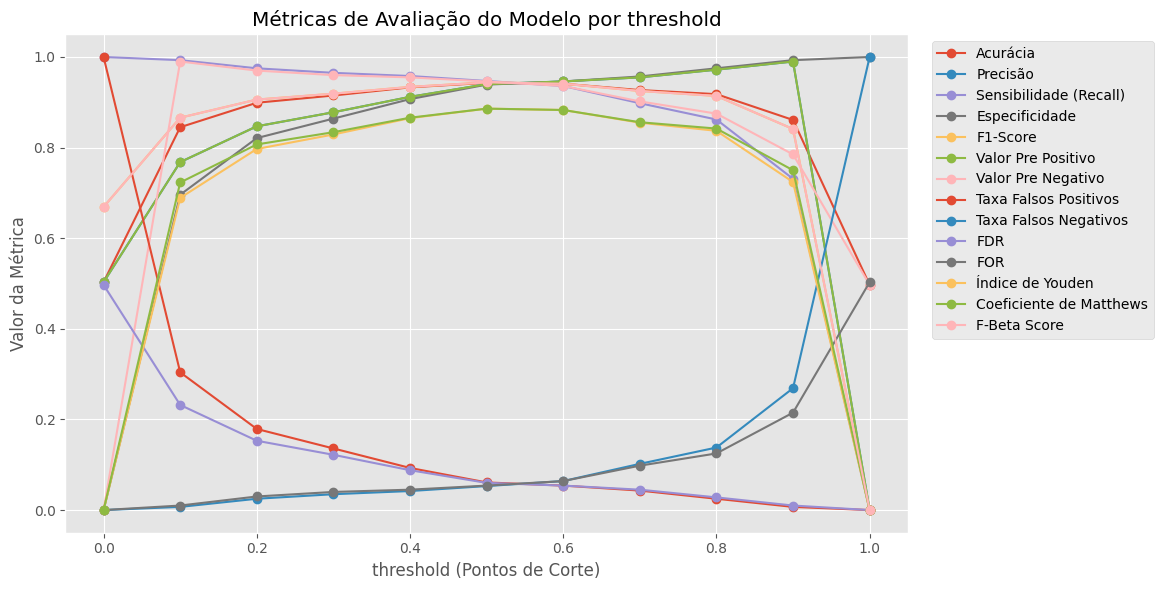

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

plt.plot(fd['threshold'], fd['acuracia'], label='Acurácia', marker='o')
plt.plot(fd['threshold'], fd['precisao'], label='Precisão', marker='o')
plt.plot(fd['threshold'], fd['sensibilidade'], label='Sensibilidade (Recall)', marker='o')
plt.plot(fd['threshold'], fd['especificidade'], label='Especificidade', marker='o')
plt.plot(fd['threshold'], fd['f1'], label='F1-Score', marker='o')
plt.plot(fd['threshold'], fd['valor_pre_posi'], label='Valor Pre Positivo', marker='o')
plt.plot(fd['threshold'], fd['valor_pre_neg'], label='Valor Pre Negativo', marker='o')
plt.plot(fd['threshold'], fd['taxa_falsos_positivos'], label='Taxa Falsos Positivos', marker='o')
plt.plot(fd['threshold'], fd['taxa_falsos_negativos'], label='Taxa Falsos Negativos', marker='o')
plt.plot(fd['threshold'], fd['fdr'], label='FDR', marker='o')
plt.plot(fd['threshold'], fd['fo_r'], label='FOR', marker='o')
plt.plot(fd['threshold'], fd['indice_youden'], label="Índice de Youden", marker='o')
plt.plot(fd['threshold'], fd['coef_matthews'], label='Coeficiente de Matthews', marker='o')
plt.plot(fd['threshold'], fd['fb_score'], label='F-Beta Score', marker='o')

# Configurações do gráfico
plt.title('Métricas de Avaliação do Modelo por threshold')
plt.xlabel('threshold (Pontos de Corte)')
plt.ylabel('Valor da Métrica')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

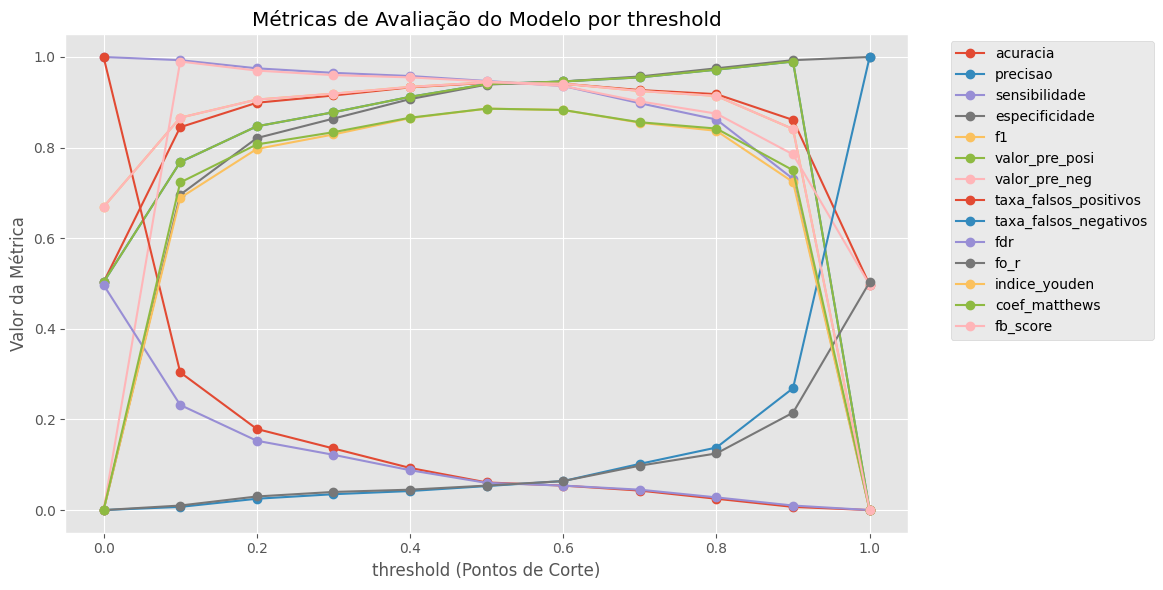

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

lista_colunas = list(fd.columns)
for col in ['threshold', 'tn', 'fp', 'fn', 'tp']:
    if col in lista_colunas:
        lista_colunas.remove(col)

for medida in lista_colunas:
    plt.plot(fd['threshold'], fd[medida], label=medida, marker='o')

# Configurações do gráfico
plt.title('Métricas de Avaliação do Modelo por threshold')
plt.xlabel('threshold (Pontos de Corte)')
plt.ylabel('Valor da Métrica')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## Construindo Função

In [14]:
def aval_modelo_corte_tabela(x_teste, y_teste, classificador, beta = 1):
        
    previsoes_proba = classificador.predict_proba(x_teste)
    probs_positivas = previsoes_proba[:, 1]

    # Inicializando um DataFrame para armazenar as métricas
    fd = pd.DataFrame(columns=['threshold', 'tn', 'fp', 'fn', 'tp'])

    # Pontos de corte de 0 a 1, com passos de 0.10
    pontos_de_corte = np.arange(0, 1.1, 0.10)

    # Loop pelos pontos de corte
    for i in pontos_de_corte:
        threshold = i
        previsoes_personalizadas = (probs_positivas >= threshold).astype(int)

        # Calculando os valores de tn, fp, fn, tp
        tn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 0))[0])
        fp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 0))[0])
        fn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 1))[0])
        tp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 1))[0])

        # Adicionando os resultados ao DataFrame 'fd'
        fd = pd.concat([fd, pd.DataFrame([[i, tn, fp, fn, tp]], columns=fd.columns)])

    # Substituir valores NaN por 0
    fd.fillna(0, inplace=True)
    fd.reset_index(drop=True, inplace=True)
    ######################################################################################

    # Inicializar as colunas das métricas com NaN
    metricas_de_aval = ['acuracia', 'precisao', 'sensibilidade', 'especificidade', 'f1',
                        'valor_pre_posi', 'valor_pre_neg', 'taxa_falsos_positivos', 'taxa_falsos_negativos',
                        'fdr', 'fo_r', 'indice_youden', 'coef_matthews', 'fb_score']
    fd[metricas_de_aval] = np.nan

    # Loop para calcular as métricas em cada linha
    for l in range(len(fd)):
        # Calcular Acurácia
        if (fd['tn'][l] + fd['fp'][l] + fd['fn'][l] + fd['tp'][l]) != 0:
            fd['acuracia'][l] = (fd['tp'][l] + fd['tn'][l]) / (fd['tn'][l] + fd['fp'][l] + fd['fn'][l] + fd['tp'][l])
        else:
            fd['acuracia'][l] = 0

        # Calcular Precisão
        if (fd['tp'][l] + fd['fp'][l]) != 0:
            fd['precisao'][l] = fd['tp'][l] / (fd['tp'][l] + fd['fp'][l])
        else:
            fd['precisao'][l] = 0

        # Calcular Sensibilidade (Recall)
        if (fd['tp'][l] + fd['fn'][l]) != 0:
            fd['sensibilidade'][l] = fd['tp'][l] / (fd['tp'][l] + fd['fn'][l])
        else:
            fd['sensibilidade'][l] = 0

        # Calcular Especificidade
        if (fd['tn'][l] + fd['fp'][l]) != 0:
            fd['especificidade'][l] = fd['tn'][l] / (fd['tn'][l] + fd['fp'][l])
        else:
            fd['especificidade'][l] = 0

        # Calcular F1-Score
        if (fd['precisao'][l] + fd['sensibilidade'][l]) != 0:
            fd['f1'][l] = 2 * (fd['precisao'][l] * fd['sensibilidade'][l]) / (fd['precisao'][l] + fd['sensibilidade'][l])
        else:
            fd['f1'][l] = 0

        # Calcular Valor Preditivo Positivo
        if (fd['tp'][l] + fd['fp'][l]) != 0:
            fd['valor_pre_posi'][l] = fd['tp'][l] / (fd['tp'][l] + fd['fp'][l])
        else:
            fd['valor_pre_posi'][l] = 0

        # Calcular Valor Preditivo Negativo
        if (fd['tn'][l] + fd['fn'][l]) != 0:
            fd['valor_pre_neg'][l] = fd['tn'][l] / (fd['tn'][l] + fd['fn'][l])
        else:
            fd['valor_pre_neg'][l] = 0

        # Calcular Taxa de Falsos Positivos
        fd['taxa_falsos_positivos'][l] = 1 - fd['especificidade'][l]

        # Calcular Taxa de Falsos Negativos
        fd['taxa_falsos_negativos'][l] = 1 - fd['sensibilidade'][l]

        # Calcular False Discovery Rate (FDR)
        if (fd['tp'][l] + fd['fp'][l]) != 0:
            fd['fdr'][l] = fd['fp'][l] / (fd['tp'][l] + fd['fp'][l])
        else:
            fd['fdr'][l] = 0

        # Calcular False Omission Rate (FOR)
        if (fd['tn'][l] + fd['fn'][l]) != 0:
            fd['fo_r'][l] = fd['fn'][l] / (fd['tn'][l] + fd['fn'][l])
        else:
            fd['fo_r'][l] = 0

        # Calcular Índice de Youden
        fd['indice_youden'][l] = fd['sensibilidade'][l] + fd['especificidade'][l] - 1

        # Calcular Coeficiente de Matthews (MCC)
        denom_matthews = (fd['tp'][l]+fd['fp'][l])*(fd['tp'][l]+fd['fn'][l])*(fd['tn'][l]+fd['fp'][l])*(fd['tn'][l]+fd['fn'][l])
        if denom_matthews != 0:
            fd['coef_matthews'][l] = (fd['tp'][l]*fd['tn'][l] - fd['fp'][l]*fd['fn'][l]) / np.sqrt(denom_matthews)
        else:
            fd['coef_matthews'][l] = 0

        # Calcular F-beta Score
        denom_fb_score = (beta**2 * fd['valor_pre_posi'][l]) + fd['sensibilidade'][l]
        if denom_fb_score != 0:
            fd['fb_score'][l] = (1 + beta**2) * (fd['valor_pre_posi'][l] * fd['sensibilidade'][l]) / denom_fb_score
        else:
            fd['fb_score'][l] = 0

    fd[metricas_de_aval] = fd[metricas_de_aval].round(3)
    return fd
    ######################################################################################

tabela = aval_modelo_corte_tabela(x_teste, y_teste, classificador)
tabela

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.0,0,280,0,283,0.503,0.503,1.000,0.000,0.669,0.503,0.000,1.000,0.000,0.497,0.000,0.000,0.000,0.669
1,0.1,195,85,2,281,0.845,0.768,0.993,0.696,0.866,0.768,0.990,0.304,0.007,0.232,0.010,0.689,0.723,0.866
2,0.2,230,50,7,276,0.899,0.847,0.975,0.821,0.906,0.847,0.970,0.179,0.025,0.153,0.030,0.797,0.807,0.906
3,0.3,242,38,10,273,0.915,0.878,0.965,0.864,0.919,0.878,0.960,0.136,0.035,0.122,0.040,0.829,0.834,0.919
4,0.4,254,26,12,271,0.933,0.912,0.958,0.907,0.934,0.912,0.955,0.093,0.042,0.088,0.045,0.865,0.866,0.934
5,0.5,263,17,15,268,0.943,0.940,0.947,0.939,0.944,0.940,0.946,0.061,0.053,0.060,0.054,0.886,0.886,0.944
6,0.6,265,15,18,265,0.941,0.946,0.936,0.946,0.941,0.946,0.936,0.054,0.064,0.054,0.064,0.883,0.883,0.941
7,0.7,268,12,29,254,0.927,0.955,0.898,0.957,0.925,0.955,0.902,0.043,0.102,0.045,0.098,0.855,0.856,0.925
8,0.8,273,7,39,244,0.918,0.972,0.862,0.975,0.914,0.972,0.875,0.025,0.138,0.028,0.125,0.837,0.842,0.914
9,0.9,278,2,76,207,0.861,0.990,0.731,0.993,0.841,0.990,0.785,0.007,0.269,0.010,0.215,0.724,0.750,0.841


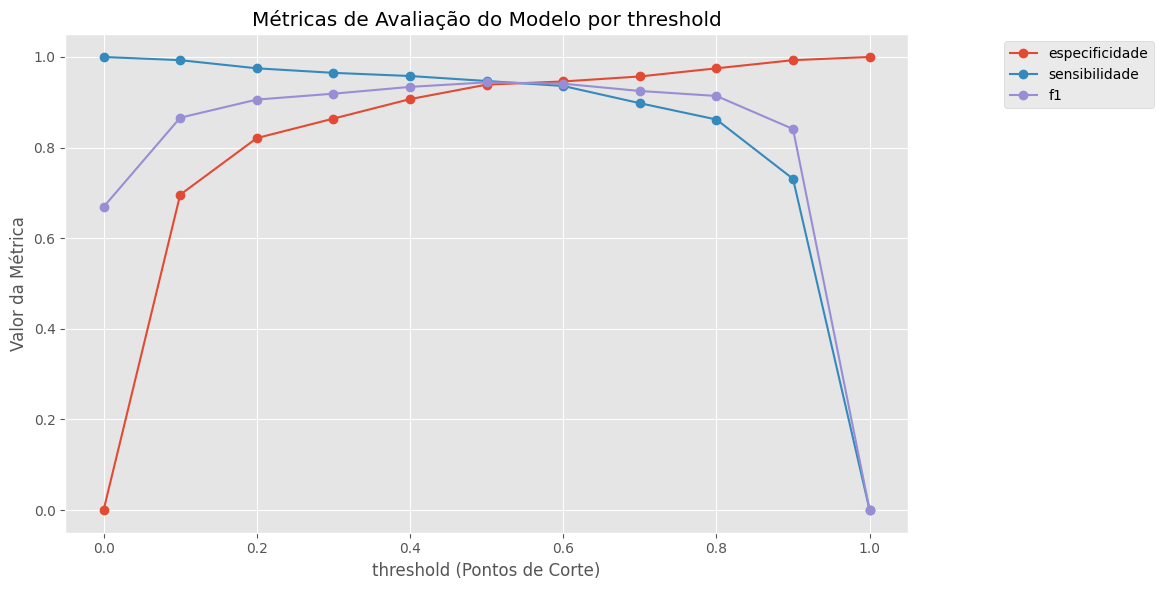

In [15]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')

def aval_modelo_corte_grafico(fd):
    plt.figure(figsize=(12, 6))
    
    ####################################################################################
    # Primeiro modo de plotar os graficos
    #plt.plot(fd['threshold'], fd['acuracia'], label='Acurácia', marker='o')
    #plt.plot(fd['threshold'], fd['precisao'], label='Precisão', marker='o')
    #plt.plot(fd['threshold'], fd['sensibilidade'], label='Sensibilidade (Recall)', marker='o')
    #plt.plot(fd['threshold'], fd['especificidade'], label='Especificidade', marker='o')
    #plt.plot(fd['threshold'], fd['f1'], label='F1-Score', marker='o')
    #plt.plot(fd['threshold'], fd['valor_pre_posi'], label='Valor Pre Positivo', marker='o')
    #plt.plot(fd['threshold'], fd['valor_pre_neg'], label='Valor Pre Negativo', marker='o')
    #plt.plot(fd['threshold'], fd['taxa_falsos_positivos'], label='Taxa Falsos Positivos', marker='o')
    #plt.plot(fd['threshold'], fd['taxa_falsos_negativos'], label='Taxa Falsos Negativos', marker='o')
    #plt.plot(fd['threshold'], fd['fdr'], label='FDR', marker='o')
    #plt.plot(fd['threshold'], fd['fo_r'], label='FOR', marker='o')
    #plt.plot(fd['threshold'], fd['indice_youden'], label="Índice de Youden", marker='o')
    #plt.plot(fd['threshold'], fd['coef_matthews'], label='Coeficiente de Matthews', marker='o')
    #plt.plot(fd['threshold'], fd['fb_score'], label='F-Beta Score', marker='o')
    #####################################################
    # Segundo modo de plotar os graficos
    lista_colunas = list(fd.columns) # Definindo colunas para o plot
    for col in ['threshold', 'tn', 'fp', 'fn', 'tp']:
        if col in lista_colunas:
            lista_colunas.remove(col)

    for medida in lista_colunas:
        plt.plot(fd['threshold'], fd[medida], label=medida, marker='o')
    ####################################################################################
    # Configurações do gráfico
    plt.title('Métricas de Avaliação do Modelo por threshold')
    plt.xlabel('threshold (Pontos de Corte)')
    plt.ylabel('Valor da Métrica')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.grid(True)
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()

aval_modelo_corte_grafico(tabela[['threshold','especificidade','sensibilidade','f1']])

# Testando novamente com outro modelo

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#classificador_arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
modelo_dt = DecisionTreeClassifier(random_state=5,
                                       max_depth = 3) #definindo profundidade maxima
modelo_dt.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [17]:
previsoes = modelo_dt.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")

**********************************************************************
Matriz de Confusão: Teste :

[[255  25]
 [ 27 256]]
**************************************************
Relatório de Classificação: Teste :

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       280
           1       0.91      0.90      0.91       283

    accuracy                           0.91       563
   macro avg       0.91      0.91      0.91       563
weighted avg       0.91      0.91      0.91       563

**********************************************************************


In [18]:
tabela = aval_modelo_corte_tabela(x_teste, y_teste, modelo_dt, beta = 1)
tabela.round(2)

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.0,0,280,0,283,0.50,0.50,1.00,0.00,0.67,0.50,0.00,1.00,0.00,0.50,0.00,0.00,0.00,0.67
1,0.1,242,38,26,257,0.89,0.87,0.91,0.86,0.89,0.87,0.90,0.14,0.09,0.13,0.10,0.77,0.77,0.89
2,0.2,255,25,27,256,0.91,0.91,0.90,0.91,0.91,0.91,0.90,0.09,0.10,0.09,0.10,0.82,0.82,0.91
3,0.3,255,25,27,256,0.91,0.91,0.90,0.91,0.91,0.91,0.90,0.09,0.10,0.09,0.10,0.82,0.82,0.91
4,0.4,255,25,27,256,0.91,0.91,0.90,0.91,0.91,0.91,0.90,0.09,0.10,0.09,0.10,0.82,0.82,0.91
5,0.5,255,25,27,256,0.91,0.91,0.90,0.91,0.91,0.91,0.90,0.09,0.10,0.09,0.10,0.82,0.82,0.91
6,0.6,255,25,27,256,0.91,0.91,0.90,0.91,0.91,0.91,0.90,0.09,0.10,0.09,0.10,0.82,0.82,0.91
7,0.7,255,25,27,256,0.91,0.91,0.90,0.91,0.91,0.91,0.90,0.09,0.10,0.09,0.10,0.82,0.82,0.91
8,0.8,270,10,98,185,0.81,0.95,0.65,0.96,0.77,0.95,0.73,0.04,0.35,0.05,0.27,0.62,0.65,0.77
9,0.9,271,9,101,182,0.80,0.95,0.64,0.97,0.77,0.95,0.73,0.03,0.36,0.05,0.27,0.61,0.64,0.77


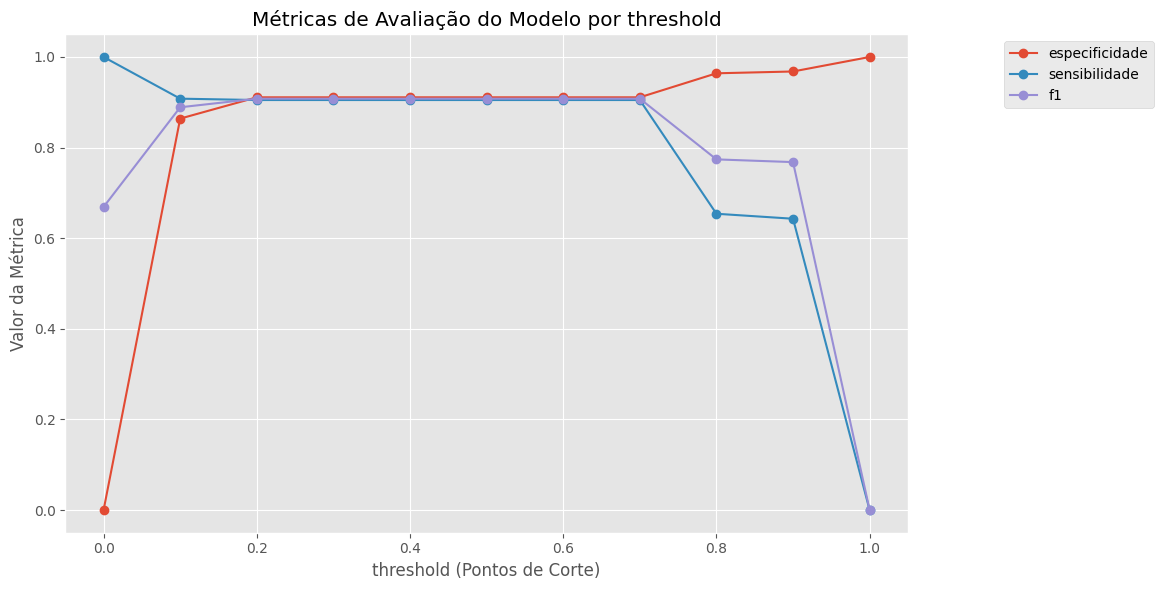

In [19]:
aval_modelo_corte_grafico(tabela[['threshold','especificidade','sensibilidade','f1']])

# FUNÇÃO DE APLICAÇÃO DE TESTE DE HIPOTESE EM NUMCAT

In [20]:
df = fake_database(2250)
df

,desfecho,idade,sexo,tabagismo,avc_previo,hipo,has,dm,doenca_cardiaca,var_num1,var_num2
0,não,19.0,M,não,não,sim,sim,sim,sim,12.0,87.821648
1,não,16.0,F,não,sim,sim,não,sim,não,15.0,81.582084
2,não,27.0,F,não,sim,não,sim,sim,não,23.0,11.714931
3,não,25.0,F,não,sim,não,sim,sim,sim,12.0,39.076125
4,não,20.0,F,não,não,não,sim,sim,sim,23.0,90.872677
...,...,...,...,...,...,...,...,...,...,...,...
2245,sim,27.0,F,não,sim,sim,sim,não,não,13.0,35.838278
2246,sim,30.0,F,sim,não,sim,sim,sim,sim,9.0,24.423866
2247,sim,24.0,M,sim,sim,sim,sim,não,não,10.0,11.270370
2248,sim,30.0,M,sim,sim,sim,não,não,sim,8.0,40.336226


In [21]:
teste_de_hipotese_numcat(df, 'var_num2','tabagismo')

{'p_value': 0.5282927443697312, 'test': "Student's T-test"}

In [22]:
grafico_numcat(df, 'var_num2', 'tabagismo')

In [23]:
pos_teste_numcat(df, 'var_num2', 'tabagismo')

P-value (Pós-Teste de Dunn):


,não,sim
não,1.000,0.523
sim,0.523,1.000


In [24]:
analise_numcat(df, 'var_num2', 'tabagismo')

{'p_value': 0.5282927443697312, 'test': "Student's T-test"}

P-value (Pós-Teste de Dunn):


,não,sim
não,1.000,0.523
sim,0.523,1.000


None